# Import libraries

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from dateutil.parser import parse
import pandas as pd

# Definition of additive time series:
## Value = Base Level + Trend + Seasonality + Error

# Definition of multiplicative time Series:
## Value = Base Level x Trend x Seasonality x Error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import Data -  Australian Drug Sales
DrugSalesData = pd.read_csv('/content/drive/MyDrive/Advanced_Machine_Learning/Time_Series_Analysis/TimeSeriesUpload/TimeSeries.csv', parse_dates=['Date'], index_col='Date')

In [5]:
DrugSalesData.head(10)

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869
1991-01-12,4.306371
1992-01-01,5.088335
1992-01-02,2.814520
1992-01-03,2.985811


In [6]:
DrugSalesData.reset_index(inplace=True)

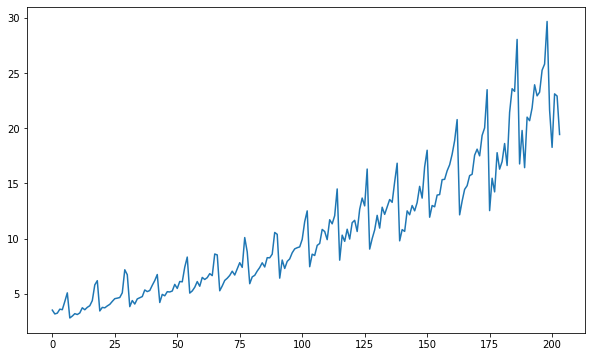

In [8]:
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

In [10]:
# Multiplicative Decomposition 
mul_result = seasonal_decompose(DrugSalesData['Value'], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(DrugSalesData['Value'], model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

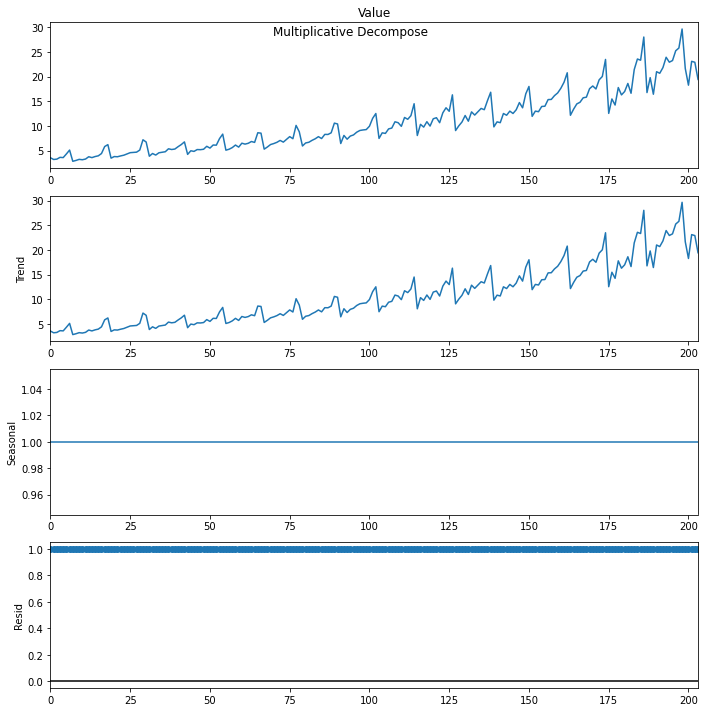

In [11]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)


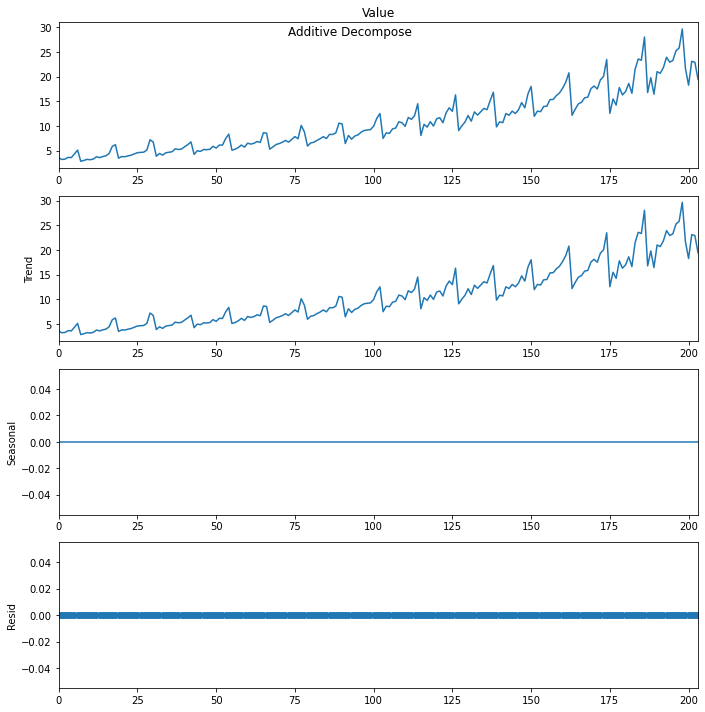

In [12]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

In [13]:
#Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [14]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


# ADFULLER TEST FOR STATIONARITY

# Definition of stationarity - constant mean and variance

In [16]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(DrugSalesData.Value.values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067287
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476
